In [1]:
# Necessary packages
import sys
sys.path.insert(0, '/home/giulia/Provenance')
import ipynb.fs.full.provenance as pr
import ipynb.fs.full.provenance_lib as pr_lib
import pandas as pd
import numpy as np

from IPython.display import Image

# Specify where to save the processed files as savepath
savepath = 'results/InstanceGen_prov/'

In [2]:
# Files get loaded from fairCorrect github repository
url = 'https://raw.githubusercontent.com/vladoxNCL/fairCorrect/master/Datasets/'
df = pd.read_csv(url + 'compas-scores-two-years.csv', header=0)

# select relevant columns
df =df[['age', 'c_charge_degree', 'race', 'sex', 'priors_count', 'days_b_screening_arrest',
        'two_year_recid', 'c_jail_in', 'c_jail_out']]

df =df[['age', 'c_charge_degree', 'race']]
df = df[:3]

# Create a new provenance document 
#p = pr.Provenance(df, savepath)
p = pr_lib.Provenance(df, savepath)

In [3]:
#INSTANCE GENERATION

#Select first Row
firstRow = df.iloc[0]

# Add row
df = df.append(firstRow, ignore_index=True)

In [4]:
#GET PROVENANCE: 
d = p.get_prov_instance_generation(df)

get_prov_instance_generation function took 7.651 ms


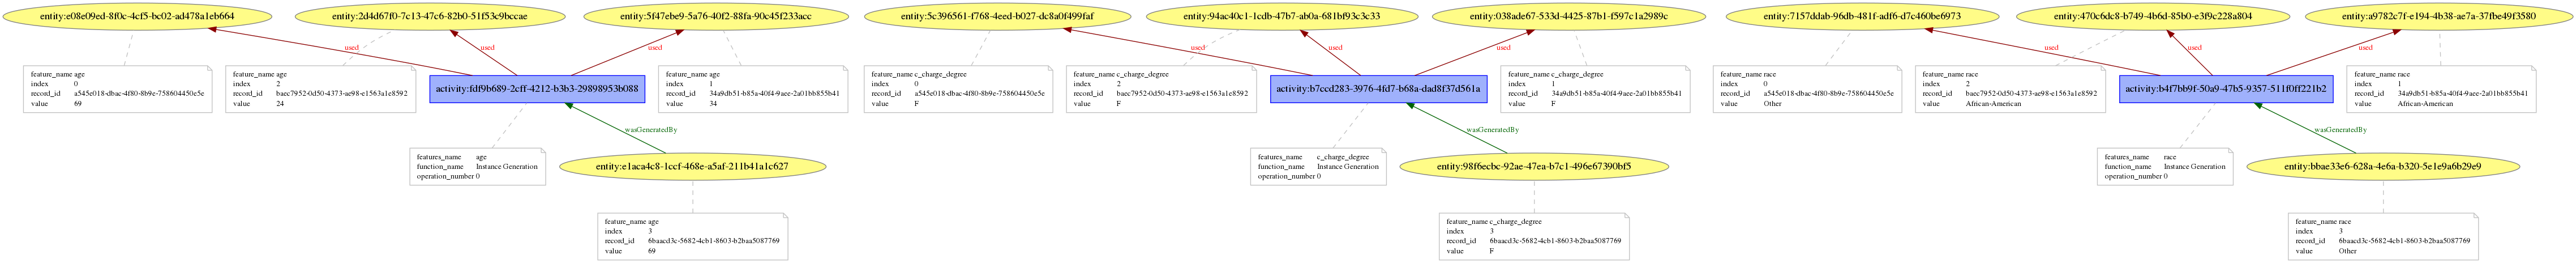

In [5]:
#visualize the graph
namefile = 'instance_gen_prov'
p.save_all_graph(namefile)
Image(savepath + namefile + '.png')